371024 Introducción al Aprendizaje Máquina  
Tarea Regresión Logística  
`Lic. Jose Ricardo Mendoza Villar`

# 1. Escoger una base de datos de kaggle con al menos 5 columnas para entrenar un modelo de regresión logística, incluir el link a la base de datos.  
- Base de Datos: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [4]:
categorical_columns = ["slope", "restecg", "thal", "cp", "ca"]
for categorical_column in categorical_columns: 
    dummies = pd.get_dummies(df[categorical_column], dtype = int, prefix = categorical_column, drop_first = True)
    df = df.drop([categorical_column], axis = 1)
    df = pd.concat([df, dummies], axis = 1)

In [5]:
df.head(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,slope_1,...,thal_1,thal_2,thal_3,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,ca_4
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,1,0,0,0,0,0,0,0


# 2. Escoger una de las columnas de la base de datos como variable objetivo.

In [6]:
X = df.drop("target", axis = 1)
y = df["target"]

In [7]:
y.value_counts() # Clases balanceadas

target
1    526
0    499
Name: count, dtype: int64

# 3. Separar la base de datos en una de entrenamiento y otra de prueba.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20250428)

# 4. Las columnas restantes serán utilizadas como variables descriptivas en modelos de regresión logística. Escoger 3 de estas variables y, para cada una:
a. Entrenar un modelo de regresión logística simple, utilizando la base de entrenamiento (realizar un gráfico de la dispersión de los puntos).  
b. Utilizar el modelo entrenado para hacer predicciones en la base de prueba.  
c. Obtener la matriz de confusión y obtener el reporte de clasificación.  
d. Dar conclusiones sobre qué quiere decir la exactitud, presición y recall obtenidos, en términos del problema que se está estudiando. 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

##################################################
-----Característica descriptiva: chol ----
----- Gráfico de Dispersión ----


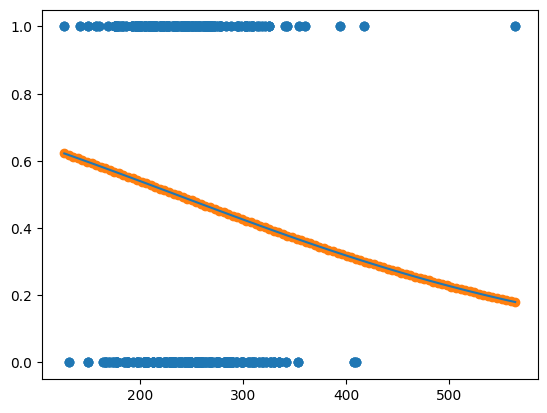

[[75 56]
 [88 89]]
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       131
           1       0.61      0.50      0.55       177

    accuracy                           0.53       308
   macro avg       0.54      0.54      0.53       308
weighted avg       0.55      0.53      0.53       308

##################################################
-----Característica descriptiva: oldpeak ----
----- Gráfico de Dispersión ----


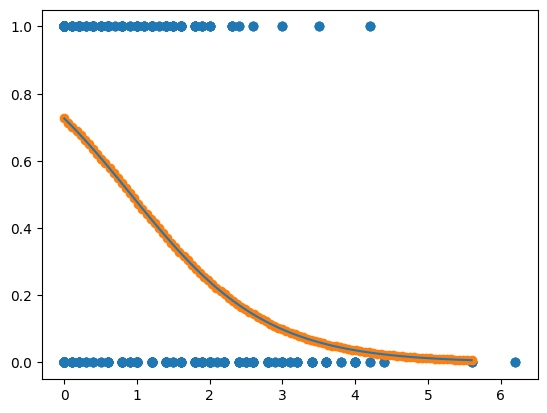

[[ 88  43]
 [ 53 124]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       131
           1       0.74      0.70      0.72       177

    accuracy                           0.69       308
   macro avg       0.68      0.69      0.68       308
weighted avg       0.69      0.69      0.69       308

##################################################
-----Característica descriptiva: trestbps ----
----- Gráfico de Dispersión ----


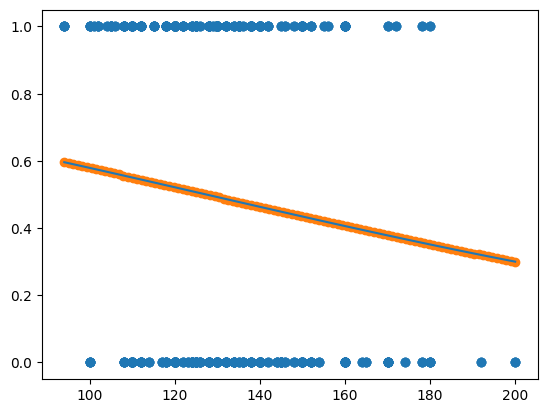

[[83 48]
 [91 86]]
              precision    recall  f1-score   support

           0       0.48      0.63      0.54       131
           1       0.64      0.49      0.55       177

    accuracy                           0.55       308
   macro avg       0.56      0.56      0.55       308
weighted avg       0.57      0.55      0.55       308



In [11]:
for colname in ["chol", "oldpeak", "trestbps"]:
    print("#"*50)
    print(f"-----Característica descriptiva: {colname} ----")
    logreg = LogisticRegression()
    # A. Entrenar el modelo, utilizando la base de entrenamiento
    logreg.fit(X_train[[colname]], y_train)

    x_graph = pd.DataFrame(np.linspace(
        X_test[[colname]].min().iloc[0],
        X_test[[colname]].max().iloc[0], 
        100
    ).reshape(-1, 1), columns = [colname])
    y_proba = logreg.predict_proba(x_graph)[:, 1]
    
    predicciones = logreg.predict_proba(X_test[[colname]])[:, 1]
    print("----- Gráfico de Dispersión ----")
    plt.scatter(X[[colname]], y)
    plt.scatter(x_graph, y_proba)
    plt.plot(x_graph, y_proba)
    plt.show()

    # B. Realizar predicciones en la base de prueba
    y_pred = logreg.predict(X_test[[colname]])
    
    # C.  Obtener la matriz de confusión y obtener el reporte de clasificación.
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

D)
- Exactitud: Mide el % de los casos donde el modelo predijo correctamente si un paciente tiene(1) o no (0) enfermedad cardíaca.
- Precisión: Se busca una alta precisión cuando el resultado del modelo puede derivar en un tratamiento que pueda tener consecuencias fuertes (ej: cirugía innecesaria). Es decir cuando se desea minimizar los falsos positivos.
- Recall: En caso que el resultado del modelo gener un diagnóstico médico, se buscaria un recall alto, porque un falso negativo (no detectar una enfermedad real a tiempo) puede ser mortal.

# 5. Entrenar un modelo de regresión logística utilizando todas las variables descriptivas.

In [12]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# 6. Obtener la matriz de confusión y reporte de clasificación del modelo anterior y compararlas con las métricas de los modelos del punto 4c. ¿Qué puede decir de esta comparación?

In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115  16]
 [ 24 153]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       131
           1       0.91      0.86      0.88       177

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



Si se comparan las regresiones logísticas de una sola variable vs el modelo con todas las características, vemos que las regresiones univariables tienen una métrica de exactitud inferior al 70%, de hecho al contrastar las gráficas, podemos ver como las clases están distribuidas tanto en los valores 0 y 1 por todo el eje de la x, sin un comportamiento que permita segmentar de forma adecuada, razón por la cual, al graficar las sigmoides, estas se encuentran muy aplanadas en el eje y; en general, realizar la regresión con todas las características ayudó mucho al modelo a tener métricas estables, con una precisión del 0.91% y un recall del 0.86% idealmente en un contexto médico nuestro modelo minimiza mejor los falsos positivos que los negativos por lo que podría resultar más valioso en un contexto de tratamiento que preventivo, aunque en temas de salud, se buscaría un modelo mucho más preciso que minimice en mayor medida estas métricas, pues cualquier sesgo puede ser clave entre la vida y la muerte de un paciente.